In [3]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import optimize
from scipy import integrate

import seaborn as sns


In [4]:
sns.set(style="darkgrid")
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [6]:
df_analyse=pd.read_csv('../data/processed/COVID_small_flat_table.csv',sep=';')  
df_analyse.sort_values('date',ascending=True).head()

,date,Germany,"Korea, South",China,France,India
0,2020-01-22,0,1,548,0,0
1,2020-01-23,0,1,643,0,0
2,2020-01-24,0,2,920,2,0
3,2020-01-25,0,2,1406,3,0
4,2020-01-26,0,3,2075,3,0


In [8]:
N0=1000000 #max susceptible population
beta=0.4   #reproduction number
gamma=0.1  #recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.India[35]
S0=N0-I0
R0=0

In [9]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


## Simulative Approach

In [10]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)

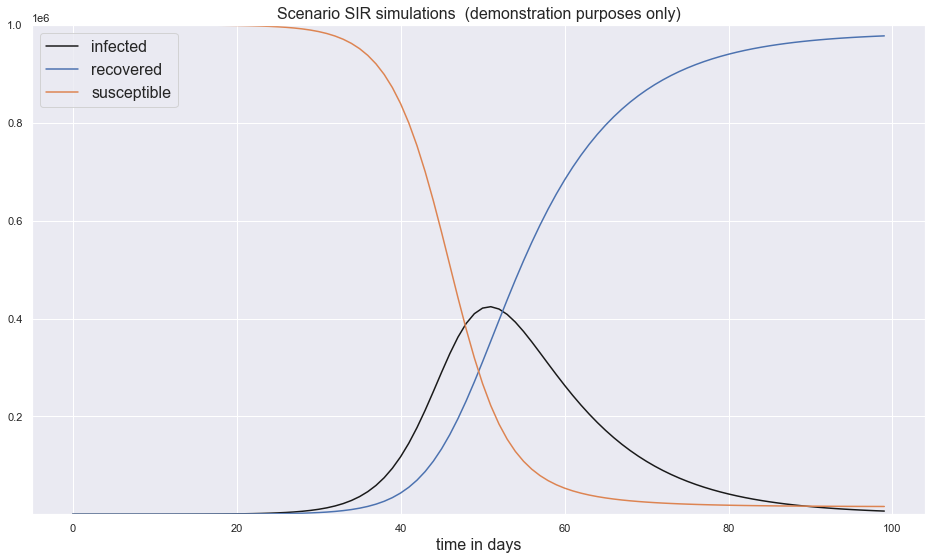

In [14]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});